In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_circles


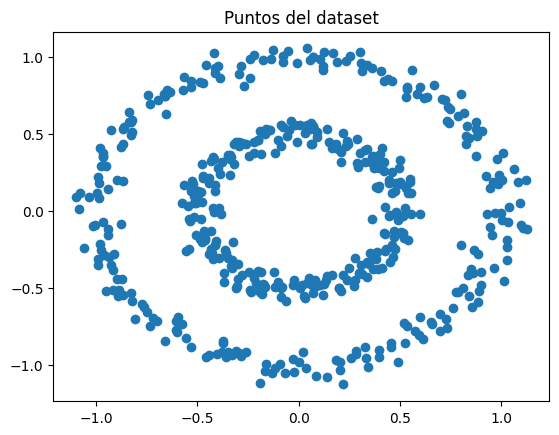

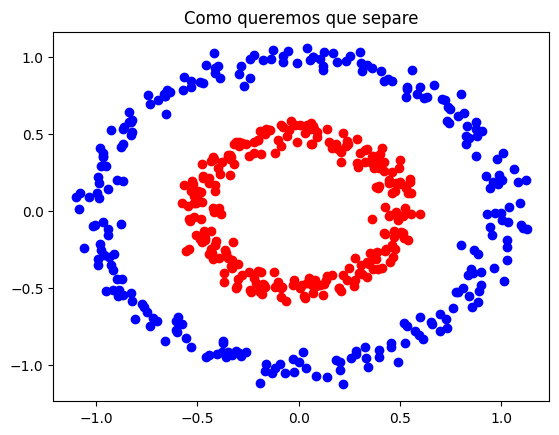

In [99]:
# Creamos los datos
n = 500
entry_params = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[:, 0], X[:, 1])
plt.title("Puntos del dataset")
plt.show()

# Queremos separar los dos circulos así:
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='b')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='r')
plt.title("Como queremos que separe")
plt.show()

# Con Torch:


In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [101]:
mish = nn.Mish()
relu = nn.ReLU()

In [102]:
# creamos nuestra red neuronal
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4, 8)
        self.layer3 = nn.Linear(8, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 4)
        self.layer6 = nn.Linear(4, 1)

    def forward(self, x):
        x = relu(self.layer1(x))
        x = relu(self.layer2(x))
        x = relu(self.layer3(x))
        x = relu(self.layer4(x))
        x = relu(self.layer5(x))
        x = self.layer6(x)
        return x


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
modelto = Net().to(device)
print(modelto)

# create your optimizer
optimizer = optim.SGD(modelto.parameters(), lr=0.03)

criterion = nn.MSELoss()

Using cpu device
Net(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=8, bias=True)
  (layer5): Linear(in_features=8, out_features=4, bias=True)
  (layer6): Linear(in_features=4, out_features=1, bias=True)
)


In [103]:
# Transformamos los datos que tenemos en numpy a tensores de torch:
# Trasformar de numpy a Tensor
X_np = torch.from_numpy(X).float().to(device)
Y_np = torch.from_numpy(Y).float().to(device)

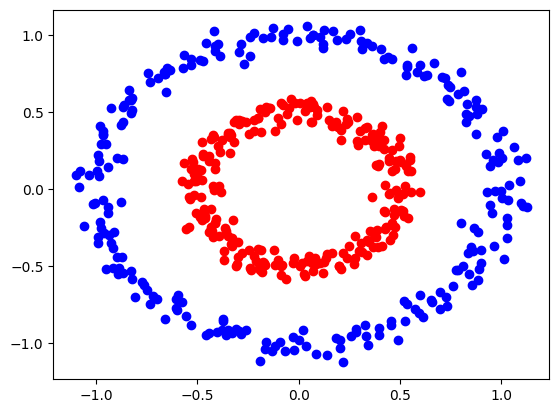

In [104]:
LOSS = []
ITER = []

for i in range(20000):
    # Calculamos los resultados para el estado actual del modelo
    result = modelto(X_np)
    loss = criterion(result, Y_np)  # Calculamos la perdida

    if i % 1000 == 0:
        LOSS.append(loss.item())
        ITER.append(i)

    modelto.zero_grad()  # inicializamos el gradiente a cero
    loss.backward()  # se calculan los gradientes respecto a la perdida
    optimizer.step()  # se realiza un paso en la optimización de los parámetros

    # se pasa a la cpu como un array de numpy
    np_result = result.cpu().detach().numpy()

    if loss.item() < 0.0015:
        break

    if i != 0 and i % 19999 == 0:
        print(result)

# se pasa a la cpu como un array de numpy
np_result = result.cpu().detach().numpy()
plt.scatter(X[np_result[:, 0] < 0.5, 0], X[np_result[:, 0] < 0.5, 1], c='b')
plt.scatter(X[np_result[:, 0] > 0.5, 0], X[np_result[:, 0] > 0.5, 1], c='r')
plt.show()

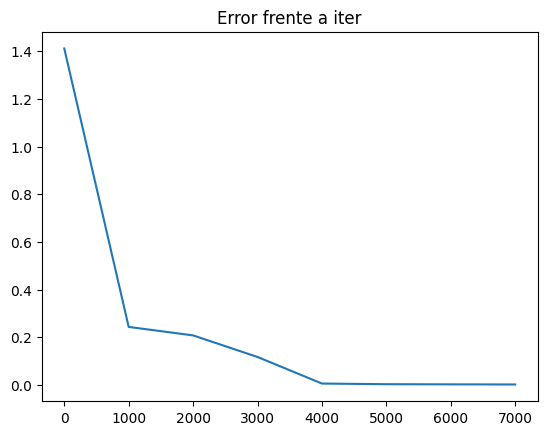

In [105]:
plt.plot(ITER, LOSS)
plt.title('Error frente a iter')
plt.show()

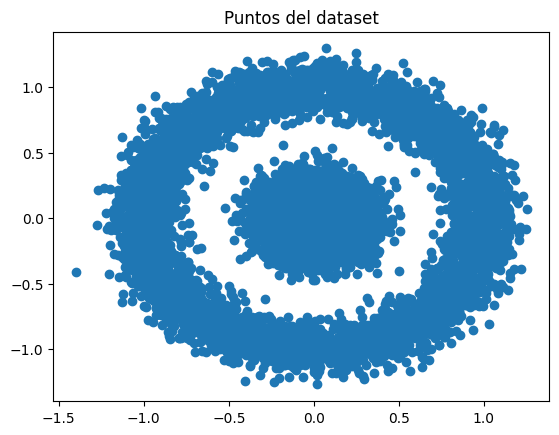

In [106]:
# Creamos los datos
n = 10000
entry_params = 2

X_test, Y_test = make_circles(n_samples=n, factor=0.2, noise=0.1)


plt.scatter(X_test[:, 0], X_test[:, 1])
plt.title("Puntos del dataset")
plt.show()

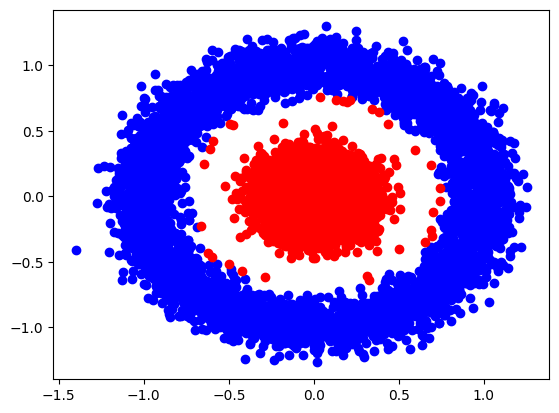

In [107]:
X_nptest = torch.from_numpy(X_test).float().to(device)
pred = modelto(X_nptest).cpu().detach().numpy()

plt.scatter(X_test[pred[:, 0] < 0.5, 0], X_test[pred[:, 0] < 0.5, 1], c='b')
plt.scatter(X_test[pred[:, 0] > 0.5, 0], X_test[pred[:, 0] > 0.5, 1], c='r')
plt.show()

# Con Keras:


In [108]:
from keras.models import Sequential
from keras.layers import Dense

In [109]:
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse')

In [124]:
model.fit(X, Y, epochs=50, batch_size=32)

Epoch 1/50
16/16 [==============================] - 0s 733us/step - loss: 0.0677
Epoch 2/50
16/16 [==============================] - 0s 867us/step - loss: 0.0626
Epoch 3/50
16/16 [==============================] - 0s 867us/step - loss: 0.0576
Epoch 4/50
16/16 [==============================] - 0s 800us/step - loss: 0.0535
Epoch 5/50
16/16 [==============================] - 0s 933us/step - loss: 0.0492
Epoch 6/50
16/16 [==============================] - 0s 933us/step - loss: 0.0451
Epoch 7/50
16/16 [==============================] - 0s 800us/step - loss: 0.0414
Epoch 8/50
16/16 [==============================] - 0s 733us/step - loss: 0.0379
Epoch 9/50
16/16 [==============================] - 0s 733us/step - loss: 0.0348
Epoch 10/50
16/16 [==============================] - 0s 733us/step - loss: 0.0317
Epoch 11/50
16/16 [==============================] - 0s 733us/step - loss: 0.0288
Epoch 12/50
16/16 [==============================] - 0s 800us/step - loss: 0.0266
Epoch 13/50
16/16 [======

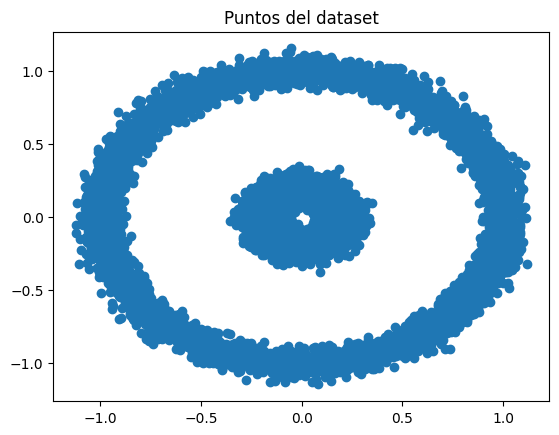

In [122]:
# Creamos los datos
n = 10000
entry_params = 2

X_test, Y_test = make_circles(n_samples=n, factor=0.2, noise=0.05)


plt.scatter(X_test[:, 0], X_test[:, 1])
plt.title("Puntos del dataset")
plt.show()

313/313 [==============================] - 0s 587us/step


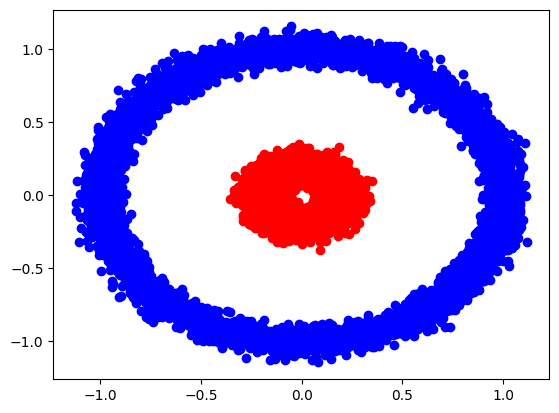

In [125]:
pred = model.predict(X_test)

plt.scatter(X_test[pred[:, 0] < 0.5, 0], X_test[pred[:, 0] < 0.5, 1], c='b')
plt.scatter(X_test[pred[:, 0] > 0.5, 0], X_test[pred[:, 0] > 0.5, 1], c='r')
plt.show()

# Con TensorFlow:


In [113]:
import tensorflow as tf

In [114]:
modeltf = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])
modeltf.compile(optimizer = 'sgd', loss = 'mse')


In [118]:
modeltf.fit(X, Y, epochs=50, batch_size=32)

Epoch 1/50
16/16 [==============================] - 0s 800us/step - loss: 0.1014
Epoch 2/50
16/16 [==============================] - 0s 800us/step - loss: 0.0965
Epoch 3/50
16/16 [==============================] - 0s 867us/step - loss: 0.0924
Epoch 4/50
16/16 [==============================] - 0s 800us/step - loss: 0.0877
Epoch 5/50
16/16 [==============================] - 0s 800us/step - loss: 0.0836
Epoch 6/50
16/16 [==============================] - 0s 800us/step - loss: 0.0790
Epoch 7/50
16/16 [==============================] - 0s 800us/step - loss: 0.0743
Epoch 8/50
16/16 [==============================] - 0s 800us/step - loss: 0.0703
Epoch 9/50
16/16 [==============================] - 0s 800us/step - loss: 0.0659
Epoch 10/50
16/16 [==============================] - 0s 867us/step - loss: 0.0612
Epoch 11/50
16/16 [==============================] - 0s 800us/step - loss: 0.0565
Epoch 12/50
16/16 [==============================] - 0s 808us/step - loss: 0.0526
Epoch 13/50
16/16 [======

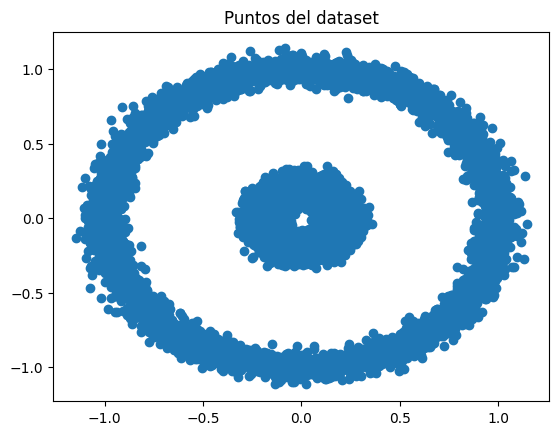

In [119]:
# Creamos los datos
n = 10000
entry_params = 2

X_test, Y_test = make_circles(n_samples=n, factor=0.2, noise=0.05)


plt.scatter(X_test[:, 0], X_test[:, 1])
plt.title("Puntos del dataset")
plt.show()

313/313 [==============================] - 0s 564us/step


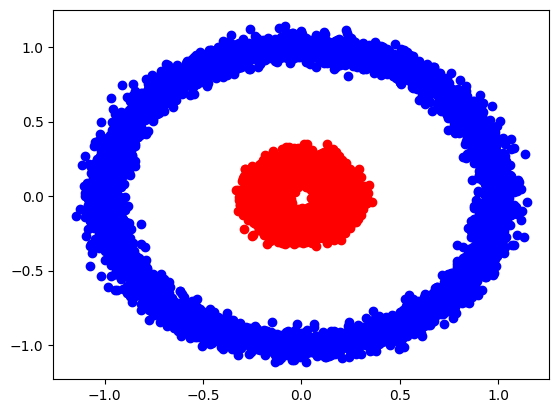

In [120]:
pred = modeltf.predict(X_test)

plt.scatter(X_test[pred[:, 0] < 0.5, 0], X_test[pred[:, 0] < 0.5, 1], c='b')
plt.scatter(X_test[pred[:, 0] > 0.5, 0], X_test[pred[:, 0] > 0.5, 1], c='r')
plt.show()